In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [93]:
from sklearn import datasets
diabetes = datasets.load_diabetes()


In [94]:
# from sklearn.model_selection import train_test_split
# X = diabetes.data
# y = diabetes.target
# target_names = diabetes.feature_names
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=15
# )

In [95]:
# prompt: generate  X_train, X_test, y_train, y_test from sklearn iris dataset

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.feature_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15
)


In [121]:
target_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [108]:
X_train.shape

(120, 4)

In [109]:
X_test.shape

(30, 4)

In [110]:
# take only 2 features for  X_train, X_test, y_train, y_test

X_train = X_train[:, :2]
X_test = X_test[:, :2]


In [111]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# polynomial_svm_clf = Pipeline([
#  ("poly_features", PolynomialFeatures(degree=3)),
#  ("scaler", StandardScaler()),
#  ("svm_clf", LinearSVC(C=10, loss="hinge"))
#  ])


In [112]:
# X, y = make_moons(n_samples=1000, noise=0.15)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=15
# )

In [113]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(
 estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
 voting='hard')
voting_clf.fit(X_train, y_train)
# voting_clf.fit(X, y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [114]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9
RandomForestClassifier 0.7333333333333333
SVC 0.9
VotingClassifier 0.9


Bagging and Pasting in Scikit-Learn

In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
  bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


In [116]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_


0.675

In [117]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7

In [118]:
bag_clf.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [0.        , 0.25227964, 0.74772036],
       [0.        , 0.12643678, 0.87356322],
       [0.        , 0.05860806, 0.94139194],
       [0.78823529, 0.21176471, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.81355932, 0.18644068],
       [0.95789474, 0.02105263, 0.02105263],
       [1.        , 0.        , 0.        ],
       [0.        , 0.62359551, 0.37640449],
       [0.        , 0.08888889, 0.91111111],
       [0.99411765, 0.00588235, 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.90502793, 0.09497207],
       [0.        , 0.38532197, 0.61467803],
       [0.        , 0.48163842, 0.51836158],
       [0.96022727, 0.01704545, 0.02272727],
       [0.98369565, 0.01630435, 0.        ],
       [0.28409091, 0.70454545, 0.01136364],
       [0.        , 0.13458111, 0.86541889],
       [0.        , 0.98869347, 0.01130653],
       [0.        , 0.23072917, 0.76927083],
       [0.

In [122]:
# import matplotlib.pyplot as plt
# import numpy as np

# plt.figure(figsize=(11, 4))

# for i, (name, clf) in enumerate((
#     ("Logistic Regression", log_clf),
#     ("Random Forest", rnd_clf),
#     ("SVM", svm_clf),
#     ("Voting", voting_clf),
#     ("Bagging", bag_clf)
# )):
#     plt.subplot(1, 5, i + 1)
#     plt.title(name)
#     plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=60)
#     plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=60, alpha=0.7)

#     # # Plot decision boundary
#     # xlim = plt.gca().get_xlim()
#     # ylim = plt.gca().get_ylim()
#     # xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
#     #                      np.linspace(*ylim, num=200))
#     # Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
#     # Z = Z.reshape(xx.shape)
#     # plt.contour(xx, yy, Z, alpha=0.3)
#     # plt.axis('off')

# plt.tight_layout()
# plt.show()


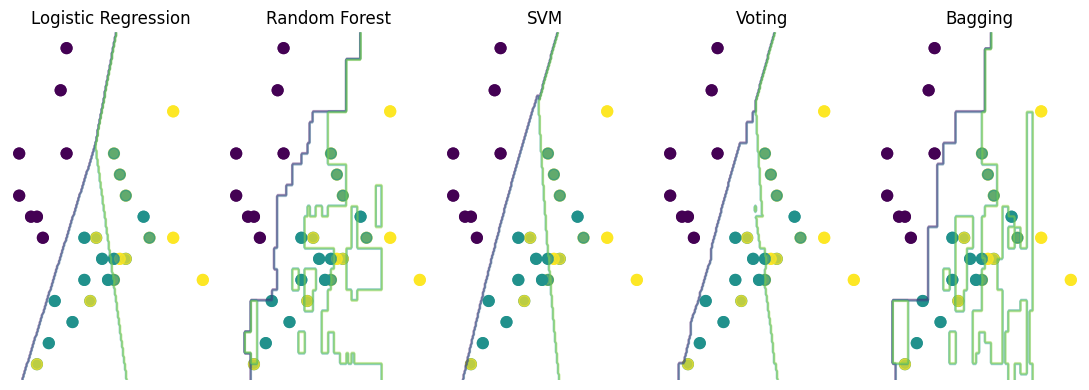

In [120]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(11, 4))

for i, (name, clf) in enumerate((
    ("Logistic Regression", log_clf),
    ("Random Forest", rnd_clf),
    ("SVM", svm_clf),
    ("Voting", voting_clf),
    ("Bagging", bag_clf)
)):
    plt.subplot(1, 5, i + 1)
    plt.title(name)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=60)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=60, alpha=0.7)

    # Plot decision boundary
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, alpha=0.3)
    plt.axis('off')

plt.tight_layout()
plt.show()
